In [4]:
SCHOOL="pomona"
SUBJECT="opinions"
START_YEAR=2010
FINAL_YEAR=2021
TOPIC_EMBEDDING_MODEL = "all-MiniLM-L6-v2" # alt: "all-mpnet-base-v2"
DATA_DIR="data"      # should be 'data'
OUTPUT_DIR="output"  # should be 'output'

In [5]:
import math
import os
import numpy as np
import pandas as pd

import nltk
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

%matplotlib inline

import spacy
nlp = spacy.load("en_core_web_lg")

2023-07-10 12:11:43.481202: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
%pwd

'/Users/anishka/Documents/GitHub/diversity-colleges'

In [8]:
import sys
sys.path.append('src')
import ouraws
import ourgraphs
import textutil

In [13]:
# NOTE: for input data & outputs to work, we need to be in the main project folder
%cd /Users/anishka/Documents/Github/diversity-colleges/src/data

/Users/anishka/Documents/GitHub/diversity-colleges/src/data


In [14]:
df = pd.read_parquet("pomona-opinions-SNAPSHOT.parquet")

In [15]:
df.shape

(1718, 6)

In [20]:
from bertopic import BERTopic

BERTOPIC_FILENAME = f"{OUTPUT_DIR}/{SCHOOL}-{SUBJECT}-BERTopic-model"
print (BERTOPIC_FILENAME)
# to load a saved one: 
if os.path.exists(BERTOPIC_FILENAME):
   print("Are you sure that you don't want to load a saved transformer? ")
else:
    topic_model = BERTopic(embedding_model=TOPIC_EMBEDDING_MODEL)

output/pomona-opinions-BERTopic-model


In [21]:
all_docs, num_diversity_words = textutil.filterText(df.body)

In [22]:
topics, probs = topic_model.fit_transform(all_docs.to_list())

Downloading: 100%|██████████████████████████| 1.18k/1.18k [00:00<00:00, 189kB/s]
Downloading: 100%|█████████████████████████████| 190/190 [00:00<00:00, 61.3kB/s]
Downloading: 100%|█████████████████████████| 10.6k/10.6k [00:00<00:00, 2.18MB/s]
Downloading: 100%|█████████████████████████████| 116/116 [00:00<00:00, 63.1kB/s]
Downloading: 100%|█████████████████████████| 39.3k/39.3k [00:00<00:00, 3.17MB/s]
Downloading: 100%|█████████████████████████| 90.9M/90.9M [00:02<00:00, 42.8MB/s]
Downloading: 100%|███████████████████████████| 53.0/53.0 [00:00<00:00, 12.1kB/s]
Downloading: 100%|█████████████████████████████| 112/112 [00:00<00:00, 30.7kB/s]
Downloading: 100%|███████████████████████████| 466k/466k [00:00<00:00, 3.80MB/s]
Downloading: 100%|██████████████████████████████| 350/350 [00:00<00:00, 113kB/s]
Downloading: 100%|█████████████████████████| 13.2k/13.2k [00:00<00:00, 3.49MB/s]
Downloading: 100%|███████████████████████████| 232k/232k [00:00<00:00, 6.61MB/s]
Downloading: 100%|██████████

In [25]:
topic_model.save(BERTOPIC_FILENAME)

In [26]:
topic_info = topic_model.get_topic_info()
topic_info.shape

(36, 5)

In [27]:
topic_info.head(15)

Topic  Count                                       Name  \
0      -1    511                  -1_new_opens_window_click   
1       0    100          0_climate_divestment_fossil_water   
2       1     92  1_candidate_election_republican_president   
3       2     90         2_political_people_correctness_new   
4       3     74                       3_time_new_window_it   
5       4     59                   4_queer_trans_gender_gay   
6       5     56                  5_white_asian_color_black   
7       6     52              6_worker_college_pomona_board   
8       7     47                 7_food_meal_dining_student   
9       8     46        8_mental_autistic_disability_autism   
10      9     44                  9_tsl_we_student_semester   
11     10     44               10_covid_19_student_pandemic   
12     11     44       11_israel_palestinian_israeli_jewish   
13     12     32               12_music_spotify_artist_song   
14     13     31                 13_sexual_rape_assault_sex   

                                       Representation  \
0   [new, opens, window, click, student, share, th...   
1   [climate, divestment, fossil, water, change, f...   
2   [candidate, election, republican, president, o...   
3   [political, people, correctness, new, window, ...   
4   [time, new, window, it, click, opens, class, c...   
5   [queer, trans, gender, gay, people, woman, tra...   
6   [white, asian, color, black, student, people, ...   
7   [worker, college, pomona, board, student, empl...   
8   [food, meal, dining, student, hall, aspc, eati...   
9   [mental, autistic, disability, autism, disable...   
10  [tsl, we, student, semester, staff, journalism...   
11  [covid, 19, student, pandemic, health, vaccine...   
12  [israel, palestinian, israeli, jewish, state, ...   
13  [music, spotify, artist, song, swift, pop, it,...   
14  [sexual, rape, assault, sex, consent, culture,...   

                                  Representative_Docs  
0   [senate speaks: a call action pomona student e...  
1   [at pomona college, environmental is political...  
2   [opinion: the democratic’s refusal support san...  
3   [letter editor: when discussing race… before g...  
4   [a voice from invisible six percent when i fre...  
5   [opinion: true allyship knowing step back grap...  
6   [opinion: hate incident demonstrates problem p...  
7   [stand with our worker several week ago, pomon...  
8   [opinion: it’s time rethink cross-campus dinin...  
9   [opinion: the claremont autism center better s...  
10  [diversity & inclusion: continuing effort tran...  
11  [opinion: thinking moving claremont? here’s th...  
12  [the double standard against israel jew-hatred...  
13  [opinion: why really hate country music? a nat...  
14  [let kid know: a new take consent education co...

In [28]:
topic_model.get_topic(0)

[('climate', 0.03125282855581169),
 ('divestment', 0.02409218167690667),
 ('fossil', 0.02020498886250186),
 ('water', 0.02007568084066121),
 ('change', 0.019928202848628594),
 ('fuel', 0.017470063573659923),
 ('sustainability', 0.015945122954482648),
 ('environmental', 0.015563642446468996),
 ('carbon', 0.014950449082977593),
 ('new', 0.014897658548451584)]

In [29]:
doc_info = topic_model.get_document_info(all_docs.to_list())
doc_info.head(15)


Document  Topic  \
0   opinion: cmc student change party culture cmc ...     -1   
1   opinion: the limit college activism (ella leha...     34   
2   opinion: tsl won’t let use oxford comma — that...     -1   
3   opinion: it’s you, syllabus week suck the firs...      3   
4   opinion: scripps’ winter housing plan show lac...     17   
5   diversity & inclusion editors: a semester revi...      9   
6   editorial board: the essay punishment, pomona ...     15   
7   opinion: pitzer revoke kevin de león’s degree ...     -1   
8   opinion: the case journaling (seohyeon lee • t...     32   
9   opinion: the ‘claremont cold’ call new sanitar...     10   
10  opinion: gangsta rap problem “many politician ...     12   
11  opinion: don’t call african american (bella pe...      5   
12  opinion: the holiday shouldn’t give eco-anxiet...      0   
13  opinion: have empathy student transported (emi...     25   
14  opinion: president chodosh’s first ncaa meetin...     17   

                                         Name  \
0                   -1_new_opens_window_click   
1   34_student_claremont_policy_demonstration   
2                   -1_new_opens_window_click   
3                        3_time_new_window_it   
4              17_athlete_sport_athletes_game   
5                   9_tsl_we_student_semester   
6               15_grade_grading_test_student   
7                   -1_new_opens_window_click   
8          32_writing_fiction_writer_academic   
9                10_covid_19_student_pandemic   
10               12_music_spotify_artist_song   
11                  5_white_asian_color_black   
12          0_climate_divestment_fossil_water   
13            25_drinking_alcohol_drink_party   
14             17_athlete_sport_athletes_game   

                                       Representation  \
0   [new, opens, window, click, student, share, th...   
1   [student, claremont, policy, demonstration, co...   
2   [new, opens, window, click, student, share, th...   
3   [time, new, window, it, click, opens, class, c...   
4   [athlete, sport, athletes, game, athletics, ha...   
5   [tsl, we, student, semester, staff, journalism...   
6   [grade, grading, test, student, sat, college, ...   
7   [new, opens, window, click, student, share, th...   
8   [writing, fiction, writer, academic, write, jo...   
9   [covid, 19, student, pandemic, health, vaccine...   
10  [music, spotify, artist, song, swift, pop, it,...   
11  [white, asian, color, black, student, people, ...   
12  [climate, divestment, fossil, water, change, f...   
13  [drinking, alcohol, drink, party, student, col...   
14  [athlete, sport, athletes, game, athletics, ha...   

                                  Representative_Docs  \
0   [senate speaks: a call action pomona student e...   
1   [claremont mckenna’s rear-view mirror a cmcers...   
2   [senate speaks: a call action pomona student e...   
3   [a voice from invisible six percent when i fre...   
4   [athlete should reconsider entitled dialogue d...   
5   [diversity & inclusion: continuing effort tran...   
6   [pomona student need holistic approach academi...   
7   [senate speaks: a call action pomona student e...   
8   [opinion: openai’s gpt-3 text generator impres...   
9   [opinion: thinking moving claremont? here’s th...   
10  [opinion: why really hate country music? a nat...   
11  [opinion: hate incident demonstrates problem p...   
12  [at pomona college, environmental is political...   
13  [drinking attitude among college student shoul...   
14  [athlete should reconsider entitled dialogue d...   

                                          Top_n_words  Probability  \
0   new - opens - window - click - student - share...     0.000000   
1   student - claremont - policy - demonstration -...     1.000000   
2   new - opens - window - click - student - share...     0.000000   
3   time - new - window - it - click - opens - cla...     0.775746   
4   athlete - sport - athletes - game - athletics ...     0

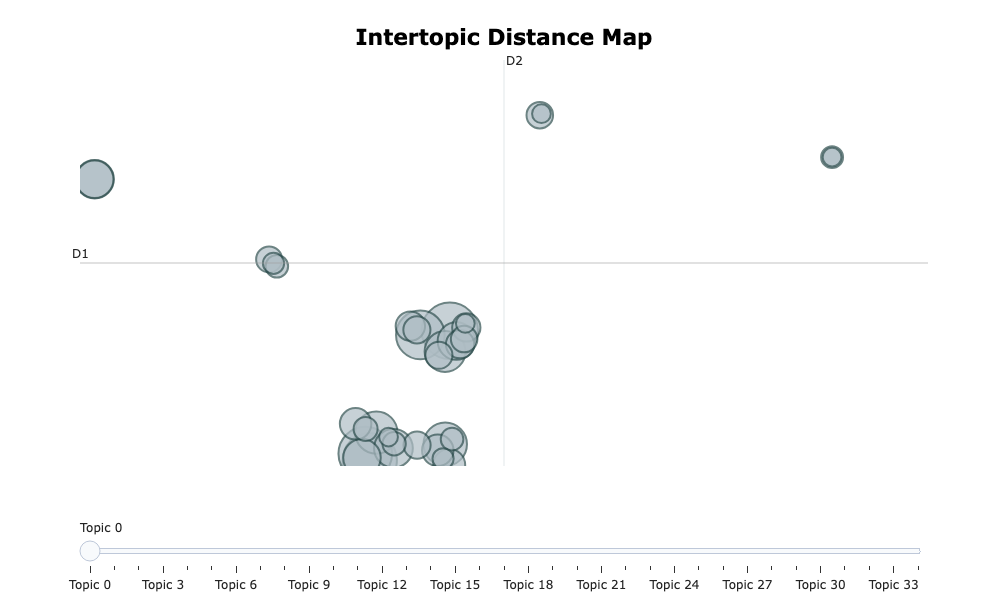

In [30]:
topic_model.visualize_topics(width=1000, height=600)


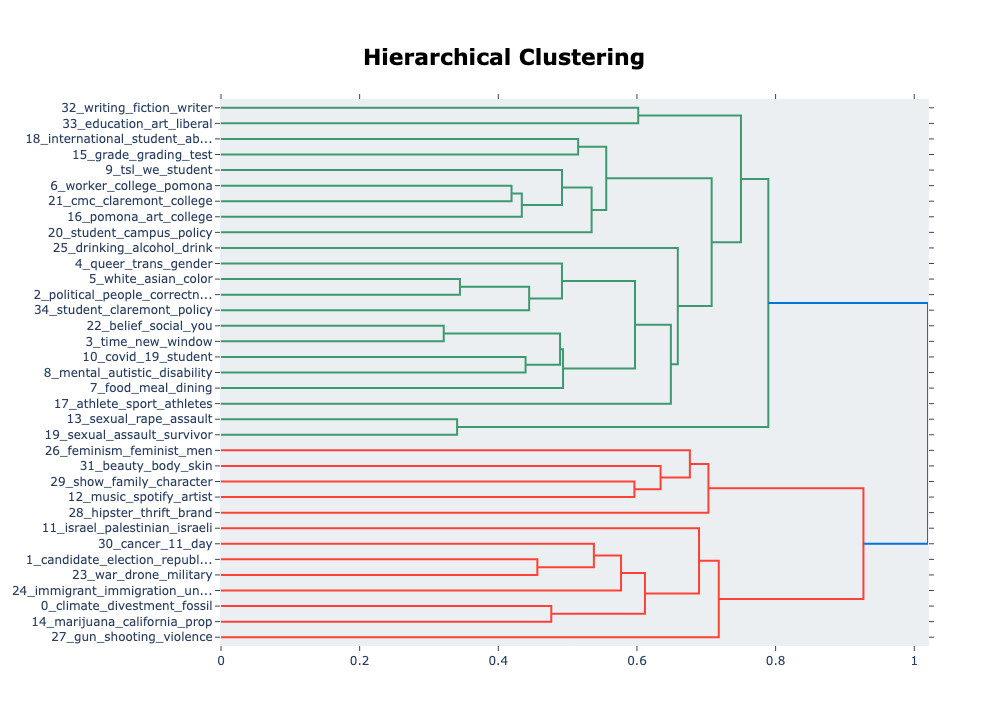

In [31]:
topic_model.visualize_hierarchy()

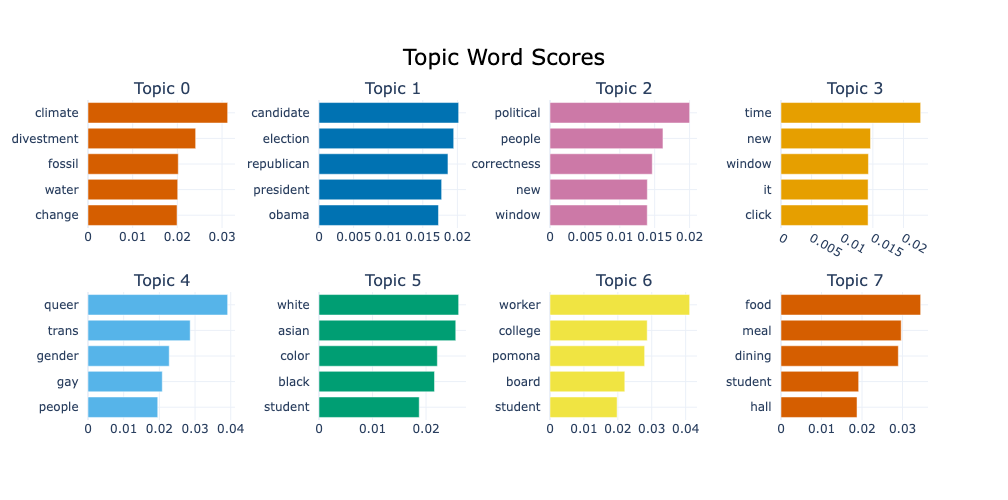

In [32]:
topic_model.visualize_barchart()

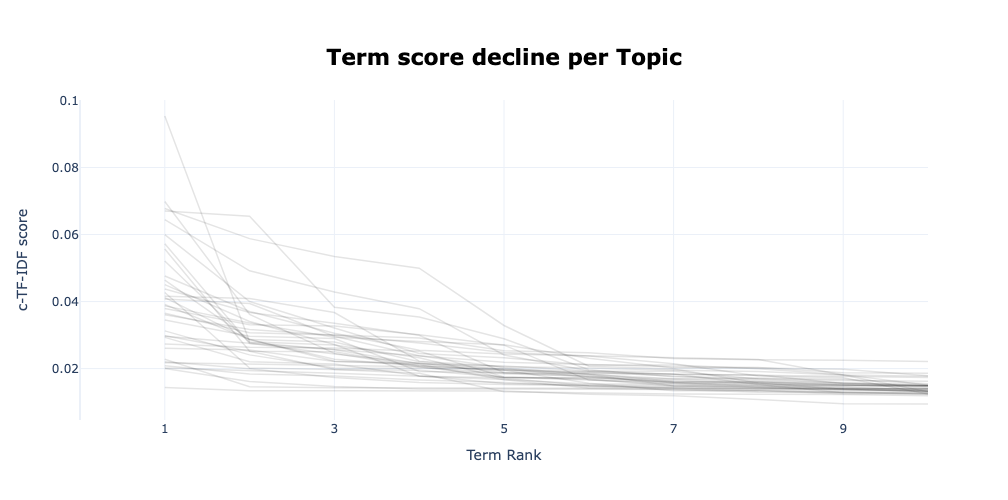

In [33]:
topic_model.visualize_term_rank()

In [35]:
all_docs, all_docs_years = textutil.filterTextWithYears(df.body, df.year)

In [36]:
topics_over_time = topic_model.topics_over_time(all_docs, all_docs_years)

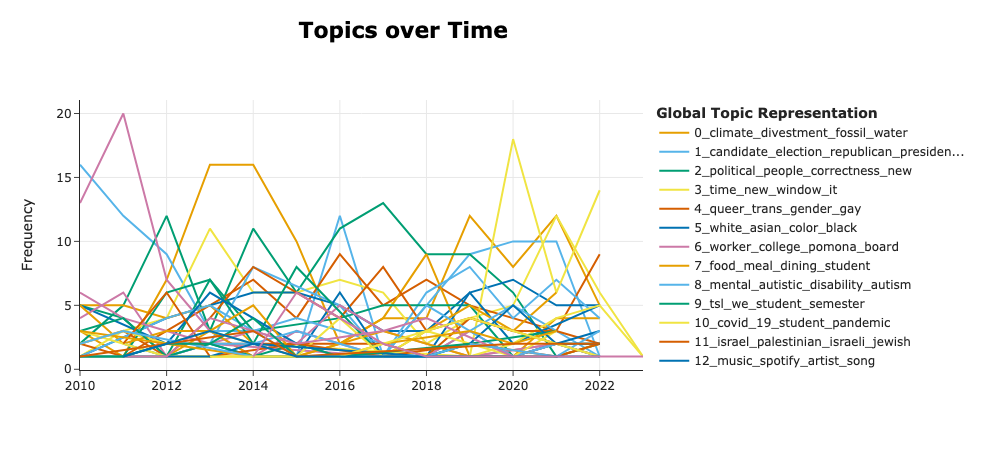

In [37]:
topic_model.visualize_topics_over_time(topics_over_time, width=1080)

In [38]:
topics_over_time 

Topic                                              Words  Frequency  \
0       -1                   new, opens, click, window, share         43   
1        0                      32, ab, california, water, 23          3   
2        1  republican, obama, president, candidate, election         16   
3        2             speech, bias, freedom, incident, right          2   
4        3                             job, hair, my, go, one          1   
..     ...                                                ...        ...   
351     33          liberal, art, existential, banking, dread          1   
352     -1         comma, oxford, wristband, stylebook, event          2   
353      3                week, habit, stress, semester, time          1   
354     17       scripps, athletes, winter, training, athlete          1   
355     34    student, institution, activism, labor, pamphlet          1   

     Timestamp                                         Name  
0         2010                    -1_new_opens_window_click  
1         2010            0_climate_divestment_fossil_water  
2         2010  1_candidate_election_republican_presiden...  
3         2010           2_political_people_correctness_new  
4         2010                         3_time_new_window_it  
..         ...                                          ...  
351       2022          33_education_art_liberal_philosophy  
352       2023                    -1_new_opens_window_click  
353       2023                         3_time_new_window_it  
354       2023               17_athlete_sport_athletes_game  
355       2023  34_student_claremont_policy_demonstratio...  

[356 rows x 5 columns]

In [39]:
results = []
for year in range(2010, 2022):
    topics_series = topics_over_time[topics_over_time.Timestamp==year].Topic
    
    topic_embeddings = []
    for topic in topics_series:
        topic_embeddings.append(topic_model.topic_embeddings_[topic])
    pairwise_measure = textutil.getNormalizedPairwiseDispersion(topic_embeddings)
    cov = textutil.getCovDispersion(topic_embeddings)
        
    results.append({
        'year': year,
        'topics_count': topics_series.nunique(),
        'size'        : df[df.year == year].shape[0],
        'topics_norm' : topics_series.nunique() / df[df.year == year].shape[0],
        'pairwise': pairwise_measure,
        'trace': cov[1],
        'norm-1': cov[2],
        'norm-2': cov[3],
        'norm-inf': cov[4]
    })
    
topics_trend_df = pd.DataFrame.from_records(results)

In [40]:
topics_trend_df.set_index('year')

topics_count  size  topics_norm  pairwise     trace    norm-1    norm-2  \
year                                                                            
2010            25   131     0.190840  0.513928  0.001146  0.000835  0.000597   
2011            24   125     0.192000  0.489758  0.001181  0.000879  0.000642   
2012            29   133     0.218045  0.511566  0.001150  0.000851  0.000600   
2013            30   165     0.181818  0.499775  0.001181  0.000878  0.000627   
2014            30   150     0.200000  0.520178  0.001157  0.000830  0.000591   
2015            28   125     0.224000  0.511706  0.001166  0.000850  0.000605   
2016            24   125     0.192000  0.528295  0.001121  0.000810  0.000568   
2017            28   113     0.247788  0.505896  0.001169  0.000869  0.000613   
2018            27   120     0.225000  0.509772  0.001164  0.000854  0.000610   
2019            29   151     0.192053  0.505237  0.001170  0.000858  0.000613   
2020            25   127     0.196850  0.489685  0.001191  0.000898  0.000648   
2021            27   132     0.204545  0.499931  0.001149  0.000866  0.000617   

      norm-inf  
year            
2010  0.000835  
2011  0.000879  
2012  0.000851  
2013  0.000878  
2014  0.000830  
2015  0.000850  
2016  0.000810  
2017  0.000869  
2018  0.000854  
2019  0.000858  
2020  0.000898  
2021  0.000866

topics_count slope:0.02098, int:27.05128, r:0.03425, p:0.91586, se:0.19361, x:range(0, 12)
pairwise slope:-0.00061, int:0.51051, r:-0.19378, p:0.54621, se:0.00098, x:range(0, 12)


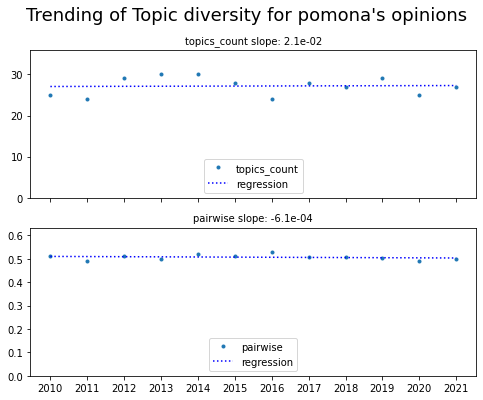

In [41]:
title = "Trending of Topic diversity for {}'s {}\n".format(
    SCHOOL, SUBJECT
)
columns = ["topics_count", "pairwise"]
graph = ourgraphs.showKeyTopicsResults(topics_trend_df, title, columns)
graph.show()